<a href="https://colab.research.google.com/github/marianameyer/DataScience/blob/main/2_Analise_Exploratoria_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Exploratória dos Dados da Netflix**

Neste projeto, serão analisados os dados do top 10 da Netflix. 

Dataset disponível em:

https://www.kaggle.com/datasets/himanshunakrani/most-popular-on-netflix?resource=download&select=most-popular.csv

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregando o Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/samples/most-popular.csv', encoding='ISO-8859-1')

In [3]:
# Visualização do Dataset
df.head()

,category,rank,show_title,season_title,hours_viewed_first_28_days
0,Films (English),1,Red Notice,NaN,364020000
1,Films (English),2,Don't Look Up,NaN,359790000
2,Films (English),3,Bird Box,NaN,282020000
3,Films (English),4,The Adam Project,NaN,233160000
4,Films (English),5,Extraction,NaN,231340000


In [4]:
# Visualização aleatória do Dataset
df.sample(10)

,category,rank,show_title,season_title,hours_viewed_first_28_days
28,TV (English),9,Ozark,Ozark: Season 4,491090000
27,TV (English),8,13 Reasons Why,13 Reasons Why: Season 2,496120000
9,Films (English),10,Spenser Confidential,NaN,197320000
23,TV (English),4,Stranger Things,Stranger Things 3,582100000
33,TV (Non-English),4,All of Us Are Dead,All of Us Are Dead: Season 1,560780000
2,Films (English),3,Bird Box,NaN,282020000
37,TV (Non-English),8,Elite,Elite: Season 3,275300000
7,Films (English),8,The Kissing Booth 2,NaN,209250000
34,TV (Non-English),5,Money Heist,Money Heist: Part 3,426400000
17,Films (Non-English),8,The Forgotten Battle,NaN,60940000


In [5]:
# Verificação dos tipos de informação
df.dtypes

category                      object
rank                           int64
show_title                    object
season_title                  object
hours_viewed_first_28_days     int64
dtype: object

In [6]:
# Verificando o tamanho do Dataset
len(df)

40

Com um dataset pequeno, faremos algumas análises.

# Categoria:

In [7]:
# Quantos tipos há na coluna "Category"
cat_type = df['category'].unique()
cat_type

array(['Films (English)', 'Films (Non-English)', 'TV (English)',
       'TV (Non-English)'], dtype=object)

Há dois tipos de programação na lista de mais populares: 

* Filmes (Língua Inglesa e Estrangeiro);
* TV Shows (Língua Inglesa e Estrangeiro).

O Dataset será separado nas quatro categorias para análise.

In [25]:
# Divisão do df
cat_film = df[0:10]
cat_film

,category,rank,show_title,season_title,hours_viewed_first_28_days
0,Films (English),1,Red Notice,NaN,364020000
1,Films (English),2,Don't Look Up,NaN,359790000
2,Films (English),3,Bird Box,NaN,282020000
3,Films (English),4,The Adam Project,NaN,233160000
4,Films (English),5,Extraction,NaN,231340000
5,Films (English),6,The Unforgivable,NaN,214700000
6,Films (English),7,The Irishman,NaN,214570000
7,Films (English),8,The Kissing Booth 2,NaN,209250000
8,Films (English),9,6 Underground,NaN,205470000
9,Films (English),10,Spenser Confidential,NaN,197320000


- A coluna 'season_title' não faz sentido na análise de filmes, por esse motivo, ela será retirada desse df.
- Também será retirada a coluna category, uma vez que sabemos se tratar apenas de filmes de língua inglesa.

In [26]:
# Retirando a coluna 'season_title'
cat_film = cat_film.drop('season_title', axis=1)
cat_film = cat_film.drop('category', axis=1)
cat_film = cat_film[['show_title', 'rank', 'hours_viewed_first_28_days']]
cat_film.head()

,show_title,rank,hours_viewed_first_28_days
0,Red Notice,1,364020000
1,Don't Look Up,2,359790000
2,Bird Box,3,282020000
3,The Adam Project,4,233160000
4,Extraction,5,231340000


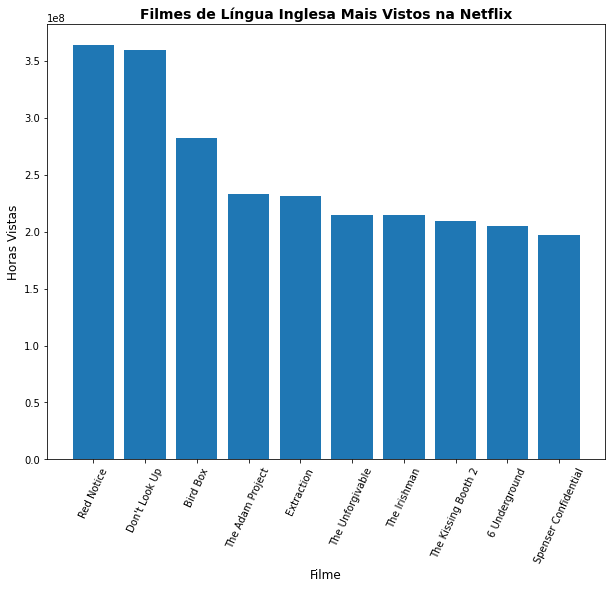

In [36]:
# Gráfico em Barras das visualizações dos Filmes em Inglês
plt.figure(figsize=(10,8))
plt.bar(cat_film.show_title, cat_film.hours_viewed_first_28_days)
plt.title('Filmes de Língua Inglesa Mais Vistos na Netflix', fontdict={'weight':'bold', 'size':14})
plt.xlabel('Filme', fontdict={'size':12})
plt.ylabel('Horas Vistas', fontdict={'size':12})
plt.xticks(rotation=65)
plt.show()